In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned_.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
## independent and dependent feature

X=df.drop('FWI', axis=1)
y=df['FWI']

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [11]:
## Feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

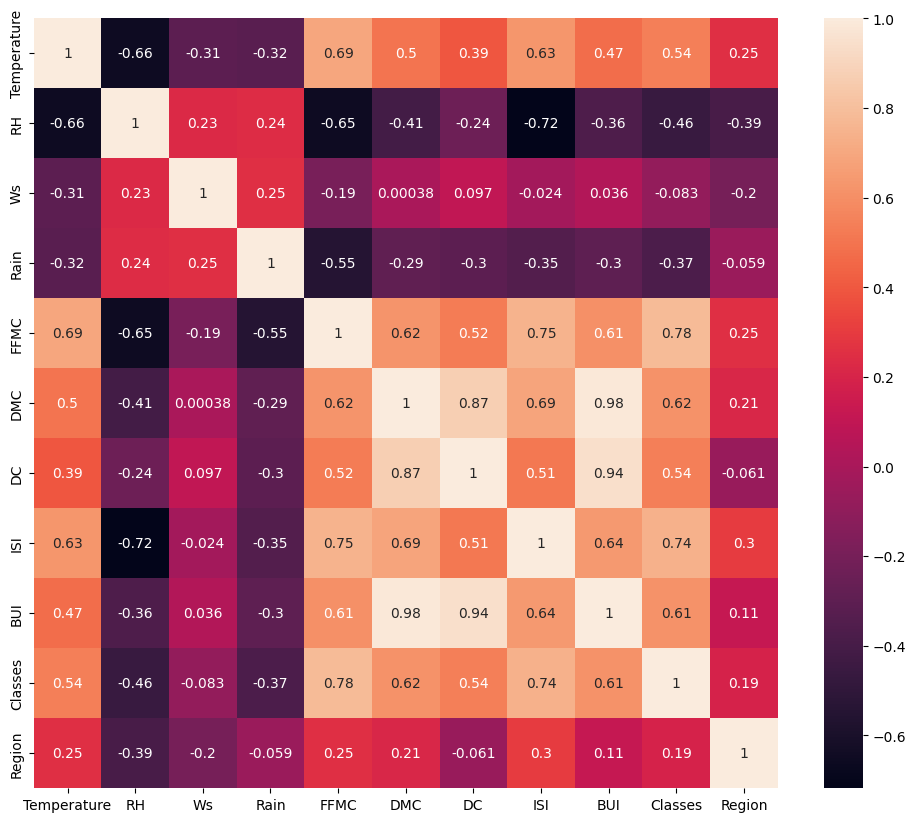

In [12]:
## check for multicolinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # in the corr data table if the index (i,j)>threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
# we appy the above function only for the training data and not for testing data to avoid data leakage 
corr_features=correlation(X_train,0.90)

In [15]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [16]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,1,1


# Feature Scaling or Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 10))

Text(0.5, 1.0, 'X_train after scaling')

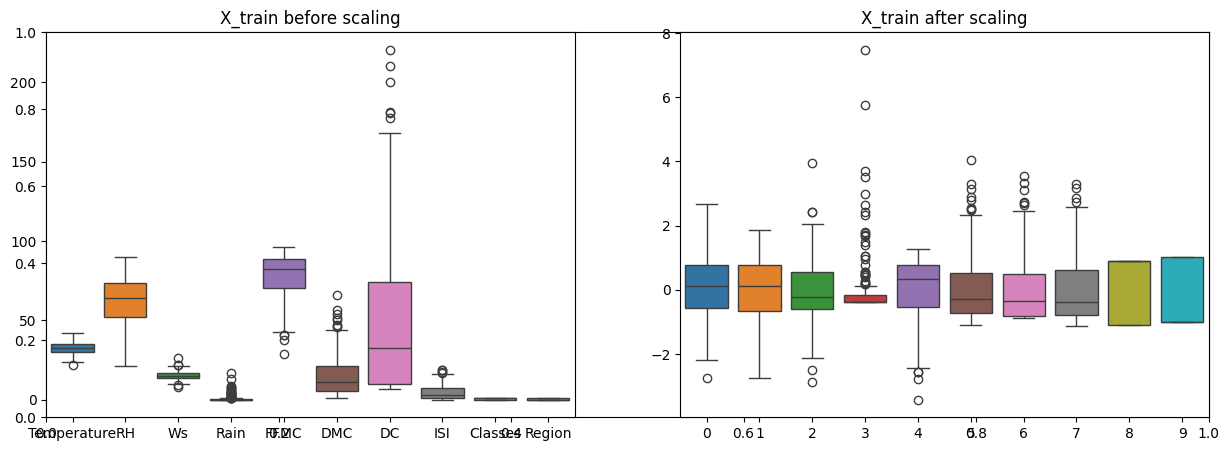

In [19]:
## Box Plots to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

## Linear Regression

Mean absolute erro 0.5170107980662417
R2 score 0.9830565611009444


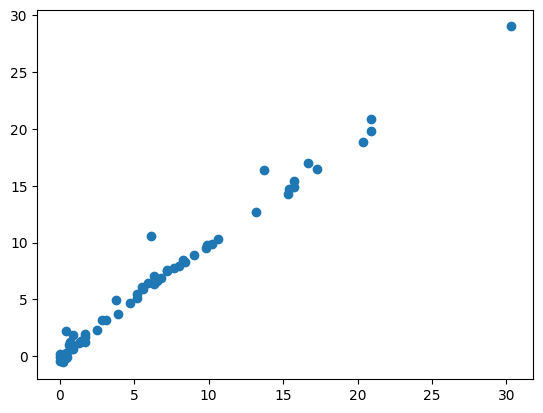

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear_regression=LinearRegression()
linear_regression.fit(X_train_scaled,y_train)
y_pred=linear_regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute erro",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

## Lasso regression

Mean absolute erro 1.125799299077472
R2 score 0.9498931628519823


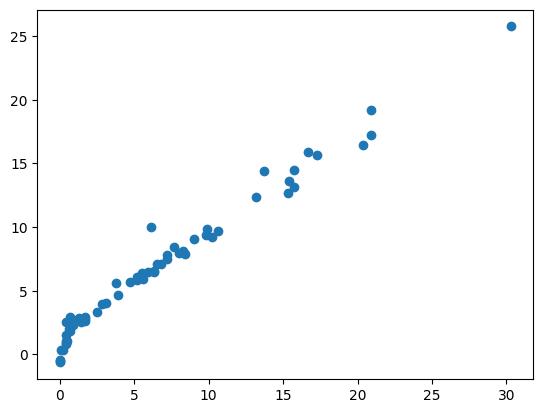

In [21]:
# Since the average FWI is between 7-14 a mae score less than 2 is okay
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute erro",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Cross validation lasso

In [22]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [23]:
lassocv.predict(X_test_scaled)

array([ 8.18538159e+00,  7.41345139e+00, -3.66821019e-02,  5.31348393e+00,
        6.71815182e+00,  1.56140620e+00,  2.50472023e+00,  7.33361195e+00,
        2.03398603e+00,  3.31843293e+00,  4.53876985e-01,  1.07417186e+01,
        9.45933277e+00,  1.64871702e+01,  1.87193231e+01,  1.55727329e+00,
        1.62851286e+00, -7.14990407e-01,  6.93533958e+00,  3.15977303e+00,
        1.85650246e+00,  2.98332857e-01,  6.31153138e+00,  1.27875987e-02,
        2.08098903e+01,  4.75489814e+00,  5.76643708e+00,  9.84031730e+00,
       -7.19344449e-01,  9.97487451e+00,  6.49891967e+00, -1.49816524e-01,
        1.02676265e+01,  1.47780964e+01,  1.56969036e+00,  1.00809100e+00,
        1.95664505e+00,  5.98777428e+00, -4.77576376e-01, -3.60610024e-01,
        6.83066604e+00,  1.84559577e+00,  8.22327832e+00, -8.83235816e-01,
        1.53227870e+01,  7.99602462e+00,  8.07558228e+00,  9.84179193e-01,
        1.28030748e+01,  9.94100350e-01,  2.85666826e+01,  5.45022160e+00,
        1.69955823e+01,  

In [24]:
lassocv.alpha_

np.float64(0.05725391318234405)

In [25]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

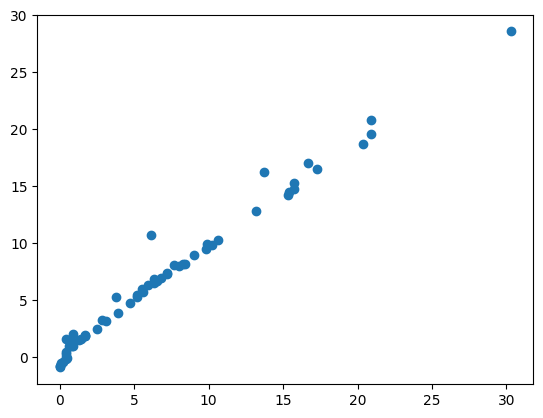

In [26]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

## Ridge regression

Mean absolute erro 0.529251976627484
R2 score 0.9824051915524249


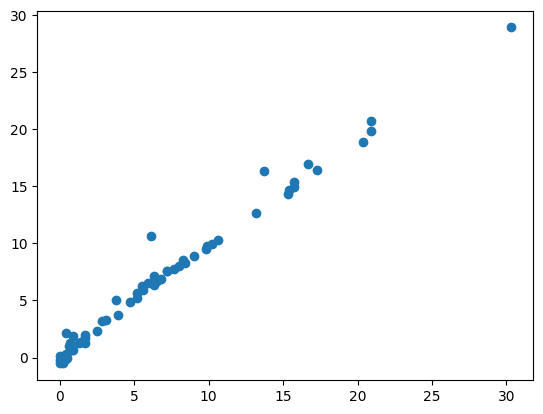

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute erro",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

## Ridgecv

Mean absolute error 0.529251976627484
R2 Score 0.9824051915524249


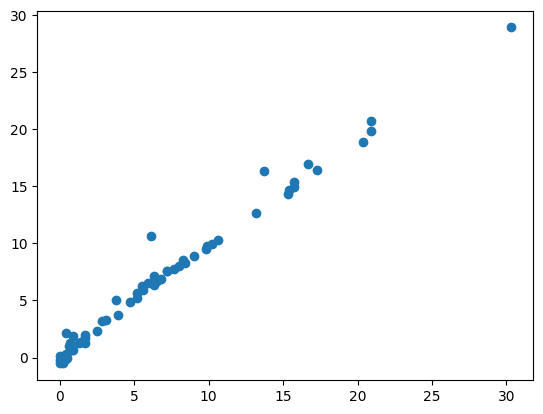

In [28]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)

In [29]:
ridgecv.alpha_

np.float64(1.0)

# ElasticNet Regression

Mean absolute erro 1.7704255521425294
R2 score 0.8887824924177792


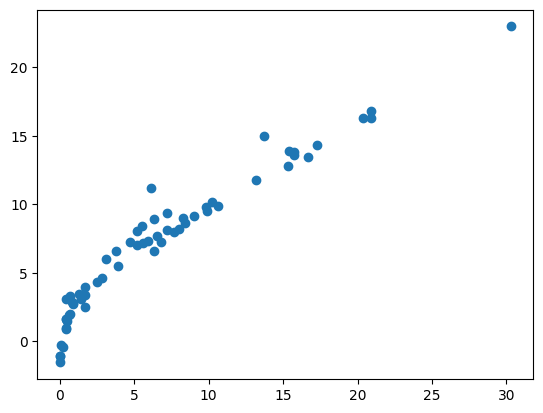

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute erro",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

## ElasticNet CV

Mean absolute error 0.6133340328806132
R2 Score 0.8887824924177792


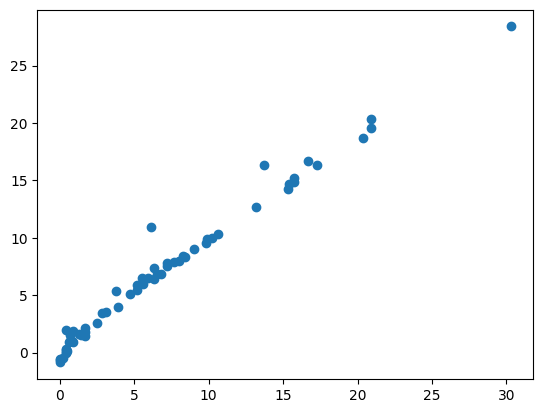

In [31]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)

In [32]:
elasticcv.alpha_

np.float64(0.04622700712786234)

In [33]:
# Pickle the machine learning models, preprocessing model standardscaler
scaler

StandardScaler()

In [34]:
# has the best accuracy
ridge

Ridge()

In [35]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))